In [ ]:
# Logistic regression is used for binary classification problem
# , where is outcome variable is categorical and typically has two possible values
# (yes/no , 0/1)

In [ ]:
# key - concepts
# 1. sigmoid function
# 2. log - odd ratio
# 3. Maximum Likelihood Estimator


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


In [ ]:
df = pd.read_csv('/content/bank-additional-full-1 (1) (1).csv', sep = ";")

In [ ]:
df

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,56.0,housemaid,married,basic.4y,no,no,no,telephone,may,mon,...,1.0,999.0,0.0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
1,57.0,services,married,high.school,unknown,no,no,telephone,may,mon,...,1.0,999.0,0.0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
2,37.0,services,married,high.school,no,yes,no,telephone,may,mon,...,1.0,999.0,0.0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
3,40.0,admin.,married,basic.6y,no,no,no,telephone,may,mon,...,1.0,999.0,0.0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
4,56.0,services,married,high.school,no,no,yes,telephone,may,mon,...,1.0,999.0,0.0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
41194,74.0,retired,married,professional.course,no,yes,no,cellular,nov,fri,...,3.0,999.0,1.0,failure,-1.1,94.767,-50.8,1.028,4963.6,no
41195,74.0,NaN,married,professional.course,no,yes,no,cellular,nov,fri,...,3.0,999.0,1.0,failure,-1.1,94.767,-50.8,1.028,4963.6,no
41196,74.0,retired,married,NaN,no,yes,no,cellular,nov,fri,...,3.0,999.0,1.0,failure,-1.1,94.767,-50.8,1.028,4963.6,no
41197,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [ ]:
df.shape

(41199, 21)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41199 entries, 0 to 41198
Data columns (total 21 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   age             41195 non-null  float64
 1   job             41194 non-null  object 
 2   marital         41194 non-null  object 
 3   education       41194 non-null  object 
 4   default         41195 non-null  object 
 5   housing         41196 non-null  object 
 6   loan            41195 non-null  object 
 7   contact         41195 non-null  object 
 8   month           41196 non-null  object 
 9   day_of_week     41196 non-null  object 
 10  duration        41196 non-null  float64
 11  campaign        41196 non-null  float64
 12  pdays           41196 non-null  float64
 13  previous        41196 non-null  float64
 14  poutcome        41194 non-null  object 
 15  emp.var.rate    41196 non-null  float64
 16  cons.price.idx  41195 non-null  float64
 17  cons.conf.idx   41196 non-null 

In [ ]:
df.isnull().sum()

,0
age,4
job,5
marital,5
education,5
default,4
housing,3
loan,4
contact,4
month,3
day_of_week,3


In [ ]:
df.isnull().sum().sum()

76

In [ ]:
df.dropna(inplace = True)

In [ ]:
df

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,56.0,housemaid,married,basic.4y,no,no,no,telephone,may,mon,...,1.0,999.0,0.0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
1,57.0,services,married,high.school,unknown,no,no,telephone,may,mon,...,1.0,999.0,0.0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
2,37.0,services,married,high.school,no,yes,no,telephone,may,mon,...,1.0,999.0,0.0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
3,40.0,admin.,married,basic.6y,no,no,no,telephone,may,mon,...,1.0,999.0,0.0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
4,56.0,services,married,high.school,no,no,yes,telephone,may,mon,...,1.0,999.0,0.0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
41185,56.0,retired,married,university.degree,no,yes,no,cellular,nov,fri,...,2.0,999.0,0.0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,no
41186,44.0,technician,married,professional.course,no,no,no,cellular,nov,fri,...,1.0,999.0,0.0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,yes
41187,74.0,retired,married,professional.course,no,yes,no,cellular,nov,fri,...,3.0,999.0,1.0,failure,-1.1,94.767,-50.8,1.028,4963.6,no
41193,94.0,retired,married,professional.course,no,yes,no,cellular,nov,fri,...,3.0,999.0,1.0,failure,-1.1,94.767,-50.8,1.028,4963.6,no


In [ ]:
df.isnull().sum().sum()

0

In [ ]:
df.duplicated().sum()

13

In [ ]:
df.drop_duplicates(inplace = True)

In [ ]:
df.duplicated().sum()

0

In [ ]:
df.dtypes

,0
age,float64
job,object
marital,object
education,object
default,object
housing,object
loan,object
contact,object
month,object
day_of_week,object


In [ ]:
df.describe()

,age,duration,campaign,pdays,previous,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed
count,41177.000000,41177.000000,41177.000000,41177.000000,41177.000000,41177.000000,41177.000000,41177.000000,41177.000000,41177.000000
mean,40.025111,258.315346,2.567890,962.465697,0.173033,0.081893,93.575749,-40.503113,3.621230,5167.029929
std,10.423948,259.302190,2.770286,186.934918,0.494975,1.570874,0.578862,4.628082,1.734463,72.257442
min,17.000000,0.000000,1.000000,0.000000,0.000000,-3.400000,92.201000,-50.800000,0.634000,4963.600000
25%,32.000000,102.000000,1.000000,999.000000,0.000000,-1.800000,93.075000,-42.700000,1.344000,5099.100000
50%,38.000000,180.000000,2.000000,999.000000,0.000000,1.100000,93.749000,-41.800000,4.857000,5191.000000
75%,47.000000,319.000000,3.000000,999.000000,0.000000,1.400000,93.994000,-36.400000,4.961000,5228.100000
max,98.000000,4918.000000,56.000000,999.000000,7.000000,1.400000,94.767000,-26.900000,5.045000,5228.100000


In [ ]:
df['y']

,y
0,no
1,no
2,no
3,no
4,no
...,...
41184,no
41185,no
41186,yes
41187,no


In [ ]:
# yes -> 1 , no-> 0
df['y'] = np.where(df['y'] == 'yes',1,0)
df['y'] = df['y'].astype(str)

In [ ]:
df.dtypes

,0
age,float64
job,object
marital,object
education,object
default,object
housing,object
loan,object
contact,object
month,object
day_of_week,object


In [ ]:
df.columns

Index(['age', 'job', 'marital', 'education', 'default', 'housing', 'loan',
       'contact', 'month', 'day_of_week', 'duration', 'campaign', 'pdays',
       'previous', 'poutcome', 'emp.var.rate', 'cons.price.idx',
       'cons.conf.idx', 'euribor3m', 'nr.employed', 'y'],
      dtype='object')

In [ ]:
col_list = list(df.columns)

In [ ]:
col_list

['age',
 'job',
 'marital',
 'education',
 'default',
 'housing',
 'loan',
 'contact',
 'month',
 'day_of_week',
 'duration',
 'campaign',
 'pdays',
 'previous',
 'poutcome',
 'emp.var.rate',
 'cons.price.idx',
 'cons.conf.idx',
 'euribor3m',
 'nr.employed',
 'y']

In [ ]:
# outlier

In [ ]:
col_list.remove('y')

In [ ]:
col_list

['age',
 'job',
 'marital',
 'education',
 'default',
 'housing',
 'loan',
 'contact',
 'month',
 'day_of_week',
 'duration',
 'campaign',
 'pdays',
 'previous',
 'poutcome',
 'emp.var.rate',
 'cons.price.idx',
 'cons.conf.idx',
 'euribor3m',
 'nr.employed']

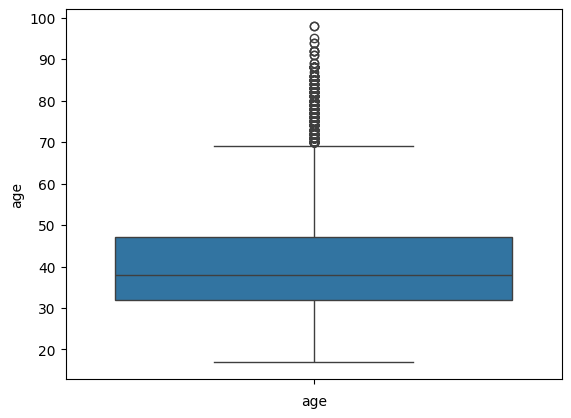

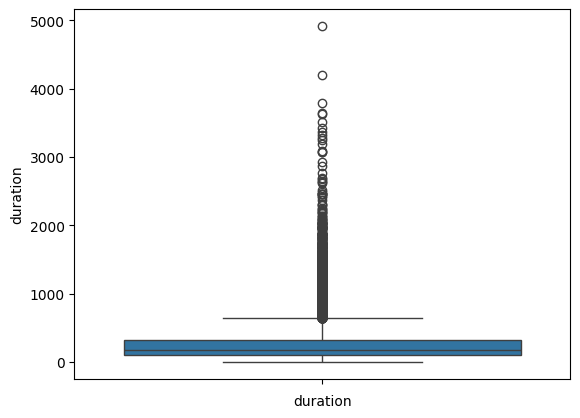

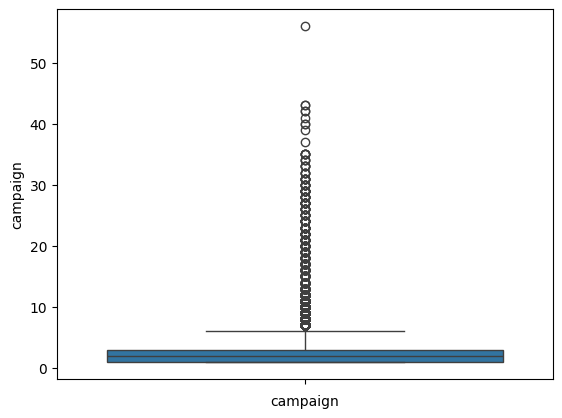

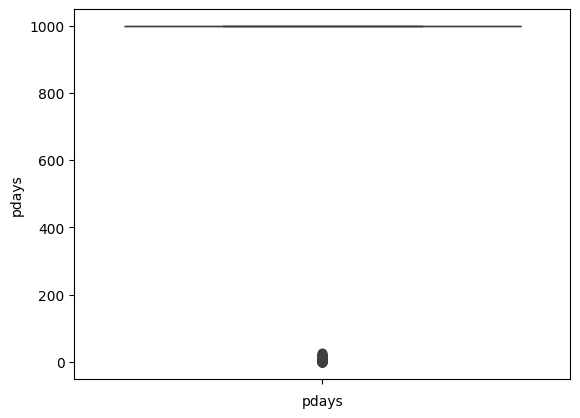

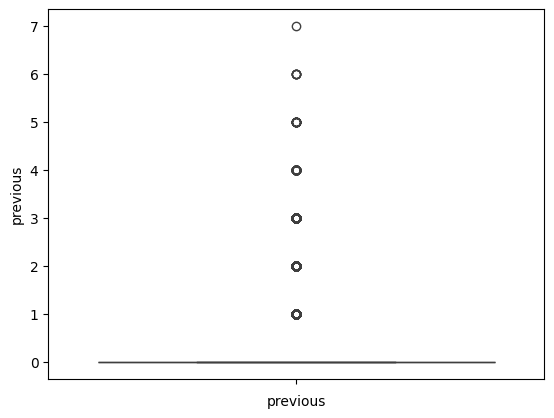

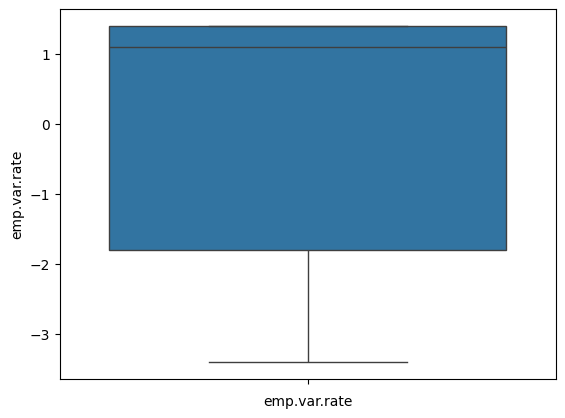

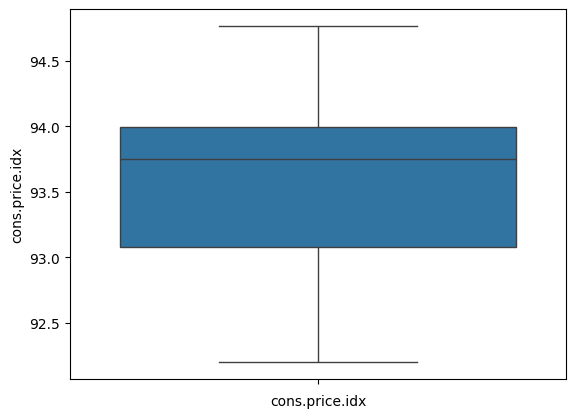

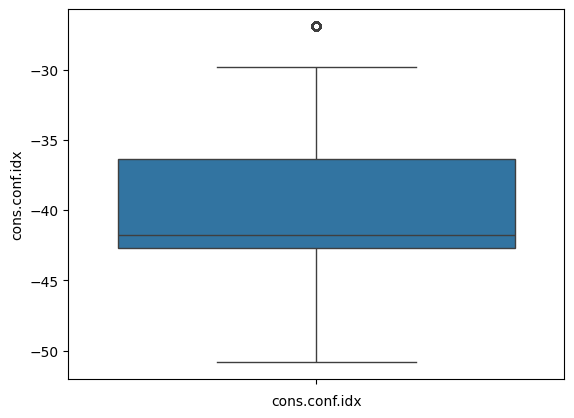

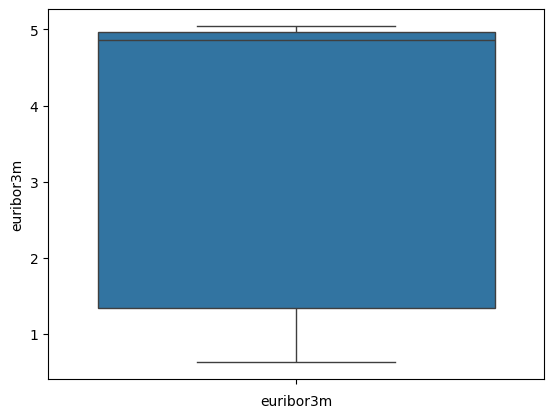

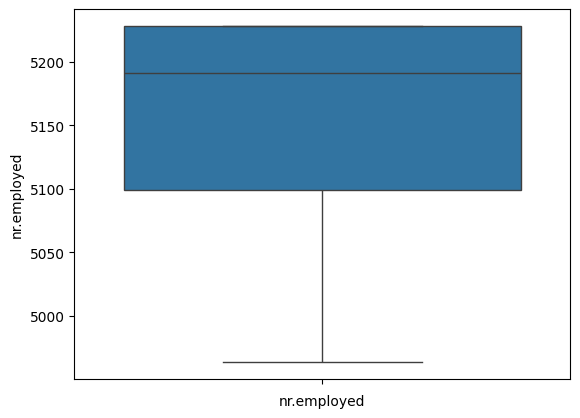

In [ ]:
for i in col_list:
    if df[i].dtype != 'object':
        sns.boxplot(df[i])
        plt.xlabel(i)
        plt.show()

In [ ]:
columns = ['age','duration', 'campaign', 'cons.conf.idx']
for column in columns:
  Q1 = df[column].quantile(0.25)
  Q3 = df[column].quantile(0.75)
  IQR = Q3 - Q1
  lower_fence = Q1 - 1.5*IQR
  upper_fence = Q3 + 1.5*IQR

  df = df[(df[column] >= lower_fence) & (df[column] <= upper_fence)]

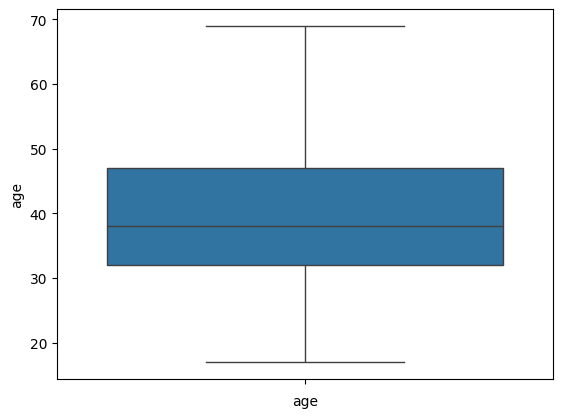

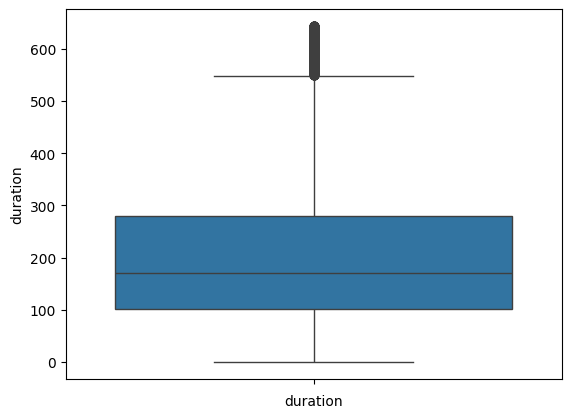

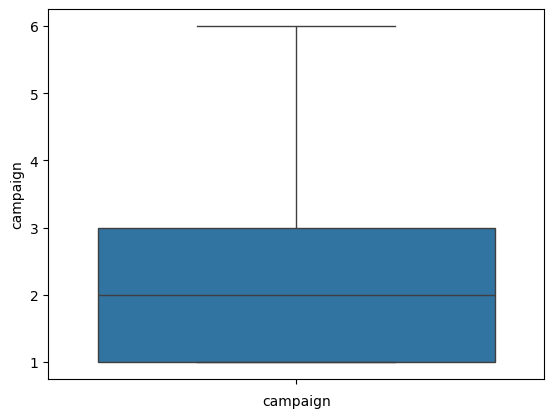

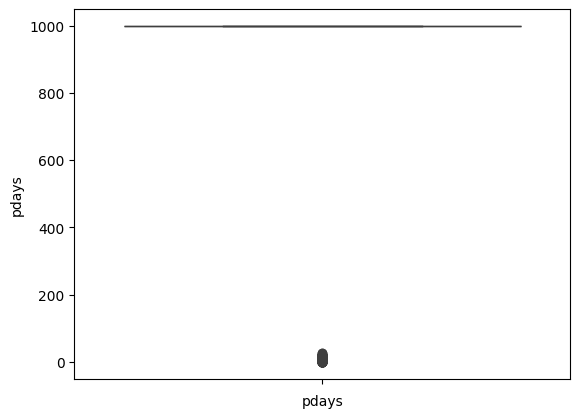

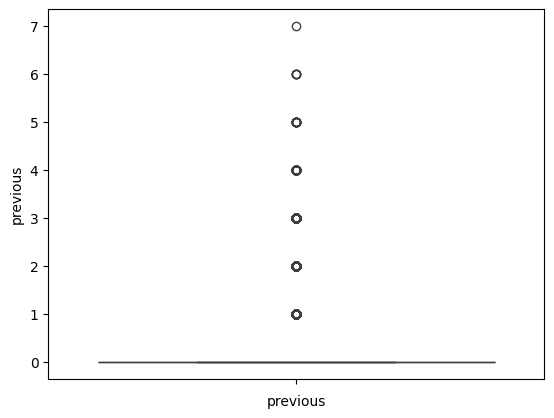

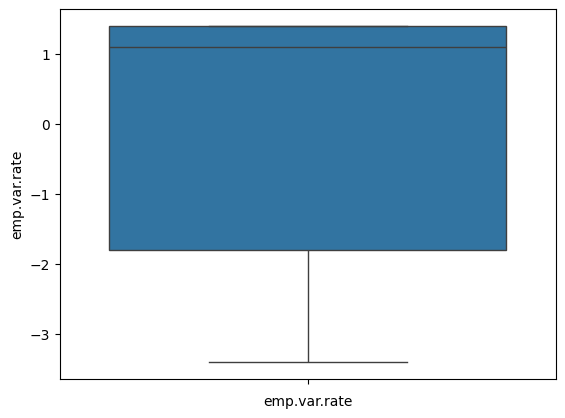

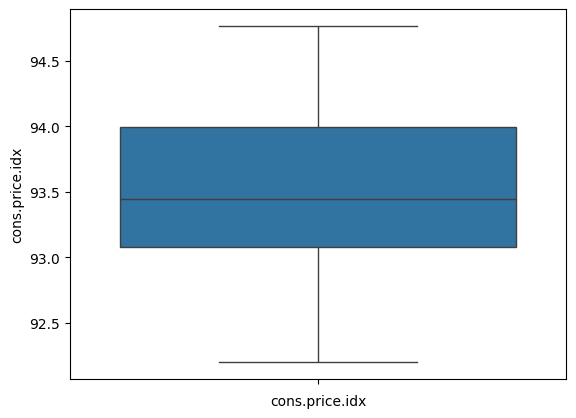

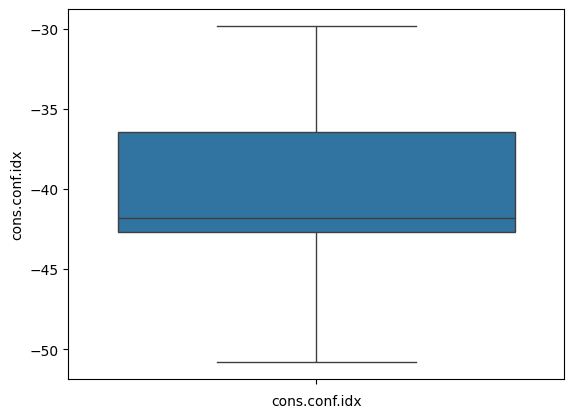

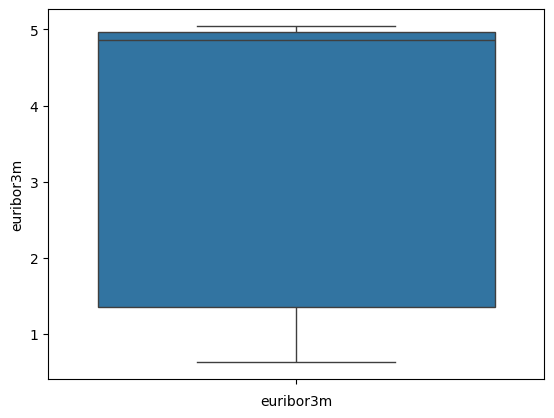

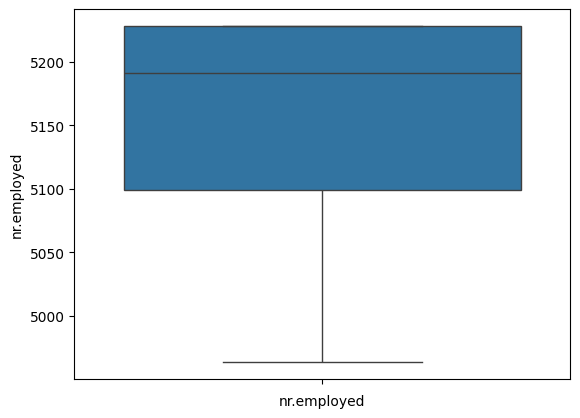

In [ ]:
for i in col_list:
    if df[i].dtype != 'object':
        sns.boxplot(df[i])
        plt.xlabel(i)
        plt.show()

In [ ]:
df['previous'].value_counts()

,count
previous,
0.0,30349
1.0,3962
2.0,600
3.0,176
4.0,57
5.0,16
6.0,4
7.0,1


In [ ]:
col_list = []
for col in df.columns:
    if (df[col].dtype == "object"):
      col_list.append(col)

In [ ]:
col_list

['job',
 'marital',
 'education',
 'default',
 'housing',
 'loan',
 'contact',
 'month',
 'day_of_week',
 'poutcome',
 'y']

In [ ]:
from sklearn.preprocessing import LabelEncoder
l1 = LabelEncoder()
for i in col_list:
    df[i] = l1.fit_transform(df[i])

In [ ]:
df

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,56.0,3,1,0,0,0,0,1,6,1,...,1.0,999.0,0.0,1,1.1,93.994,-36.4,4.857,5191.0,0
1,57.0,7,1,3,1,0,0,1,6,1,...,1.0,999.0,0.0,1,1.1,93.994,-36.4,4.857,5191.0,0
2,37.0,7,1,3,0,2,0,1,6,1,...,1.0,999.0,0.0,1,1.1,93.994,-36.4,4.857,5191.0,0
3,40.0,0,1,1,0,0,0,1,6,1,...,1.0,999.0,0.0,1,1.1,93.994,-36.4,4.857,5191.0,0
4,56.0,7,1,3,0,0,2,1,6,1,...,1.0,999.0,0.0,1,1.1,93.994,-36.4,4.857,5191.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
41181,37.0,0,1,6,0,2,0,0,7,0,...,1.0,999.0,0.0,1,-1.1,94.767,-50.8,1.028,4963.6,1
41182,29.0,10,2,0,0,2,0,0,7,0,...,1.0,9.0,1.0,2,-1.1,94.767,-50.8,1.028,4963.6,0
41184,46.0,1,1,5,0,0,0,0,7,0,...,1.0,999.0,0.0,1,-1.1,94.767,-50.8,1.028,4963.6,0
41185,56.0,5,1,6,0,2,0,0,7,0,...,2.0,999.0,0.0,1,-1.1,94.767,-50.8,1.028,4963.6,0


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 35165 entries, 0 to 41186
Data columns (total 21 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   age             35165 non-null  float64
 1   job             35165 non-null  int64  
 2   marital         35165 non-null  int64  
 3   education       35165 non-null  int64  
 4   default         35165 non-null  int64  
 5   housing         35165 non-null  int64  
 6   loan            35165 non-null  int64  
 7   contact         35165 non-null  int64  
 8   month           35165 non-null  int64  
 9   day_of_week     35165 non-null  int64  
 10  duration        35165 non-null  float64
 11  campaign        35165 non-null  float64
 12  pdays           35165 non-null  float64
 13  previous        35165 non-null  float64
 14  poutcome        35165 non-null  int64  
 15  emp.var.rate    35165 non-null  float64
 16  cons.price.idx  35165 non-null  float64
 17  cons.conf.idx   35165 non-null  floa

<Axes: >

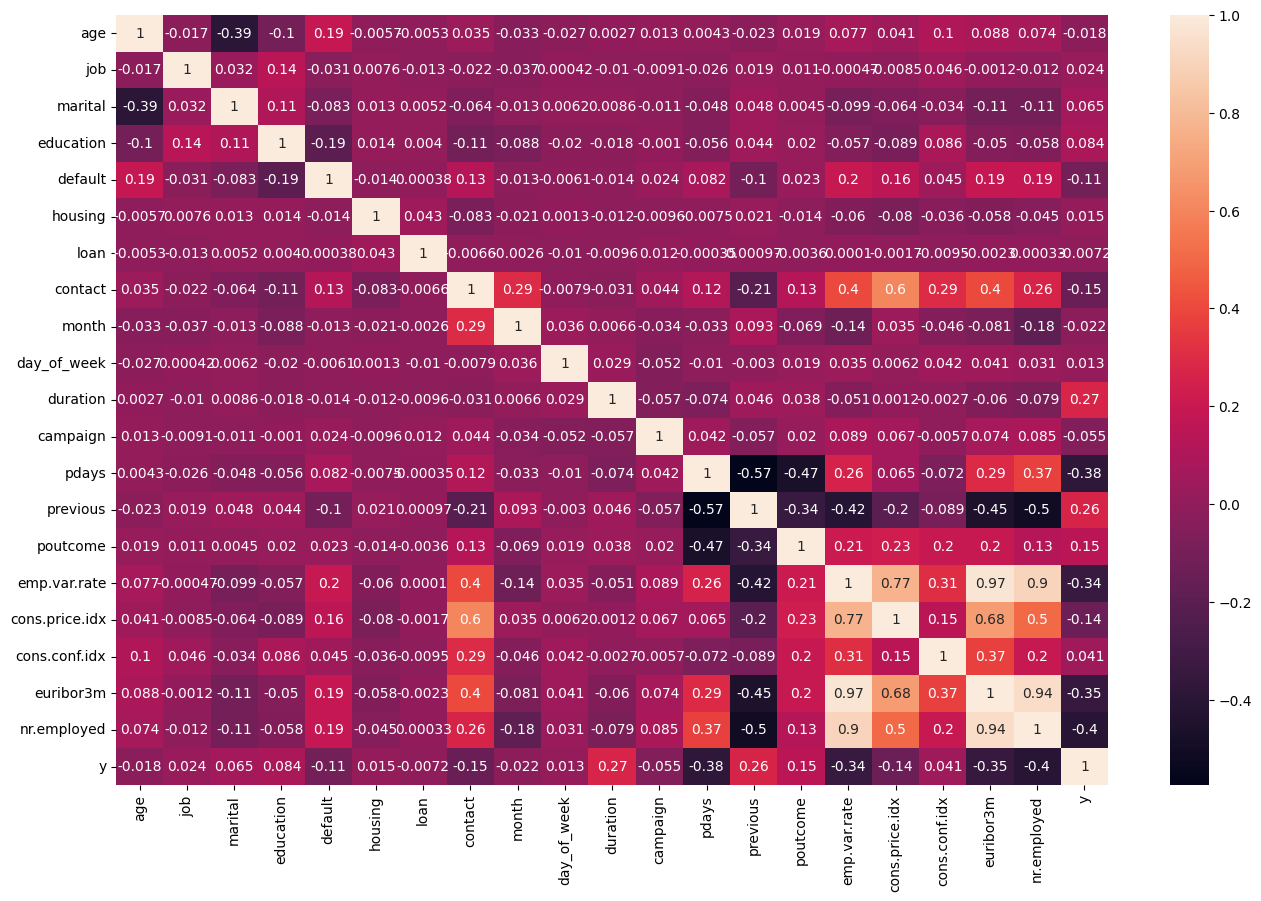

In [ ]:
plt.figure(figsize=(16,10))
sns.heatmap(df.corr(),annot = True)

In [ ]:
#vif = 1/1-r2



In [ ]:
# age - dependent varible
# all others except target are independent variable


# y = b1(pdays) + b2(education )-----

# r2

# vif = 1 / 1-r2

In [ ]:
# 1 < vif < 5 moderate correlate
# 1 = no correlation
# vif > 5 - high correlation

In [ ]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
col_list = []
for col in df.columns:
    if ((df[col].dtype != 'object') & (col != 'y')):
      col_list.append(col)


X  = df[col_list]
vif_data = pd.DataFrame()
vif_data['feature'] = X.columns
vif_data["VIF"] = [variance_inflation_factor(X.values,i) for i in range(len(X.columns))]
vif_data

,feature,VIF
0,age,22.113993
1,job,2.100861
2,marital,5.690071
3,education,4.560285
4,default,1.411946
5,housing,2.212409
6,loan,1.208306
7,contact,2.942422
8,month,6.685085
9,day_of_week,3.099808


In [ ]:
X

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,duration,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed
0,56.0,3,1,0,0,0,0,1,6,1,261.0,1.0,999.0,0.0,1,1.1,93.994,-36.4,4.857,5191.0
1,57.0,7,1,3,1,0,0,1,6,1,149.0,1.0,999.0,0.0,1,1.1,93.994,-36.4,4.857,5191.0
2,37.0,7,1,3,0,2,0,1,6,1,226.0,1.0,999.0,0.0,1,1.1,93.994,-36.4,4.857,5191.0
3,40.0,0,1,1,0,0,0,1,6,1,151.0,1.0,999.0,0.0,1,1.1,93.994,-36.4,4.857,5191.0
4,56.0,7,1,3,0,0,2,1,6,1,307.0,1.0,999.0,0.0,1,1.1,93.994,-36.4,4.857,5191.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
41181,37.0,0,1,6,0,2,0,0,7,0,281.0,1.0,999.0,0.0,1,-1.1,94.767,-50.8,1.028,4963.6
41182,29.0,10,2,0,0,2,0,0,7,0,112.0,1.0,9.0,1.0,2,-1.1,94.767,-50.8,1.028,4963.6
41184,46.0,1,1,5,0,0,0,0,7,0,383.0,1.0,999.0,0.0,1,-1.1,94.767,-50.8,1.028,4963.6
41185,56.0,5,1,6,0,2,0,0,7,0,189.0,2.0,999.0,0.0,1,-1.1,94.767,-50.8,1.028,4963.6


In [ ]:
df = df.drop(['nr.employed'],axis = 1)

In [ ]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
col_list = []
for col in df.columns:
    if ((df[col].dtype != 'object') & (col != 'y')):
      col_list.append(col)


X  = df[col_list]
vif_data = pd.DataFrame()
vif_data['feature'] = X.columns
vif_data["VIF"] = [variance_inflation_factor(X.values,i) for i in range(len(X.columns))]
vif_data

,feature,VIF
0,age,22.107715
1,job,2.100612
2,marital,5.689362
3,education,4.558657
4,default,1.409350
5,housing,2.212084
6,loan,1.208260
7,contact,2.446094
8,month,5.784547
9,day_of_week,3.098930


In [ ]:
df = df.drop(['cons.price.idx'],axis = 1)

In [ ]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
col_list = []
for col in df.columns:
    if ((df[col].dtype != 'object') & (col != 'y')):
      col_list.append(col)


X  = df[col_list]
vif_data = pd.DataFrame()
vif_data['feature'] = X.columns
vif_data["VIF"] = [variance_inflation_factor(X.values,i) for i in range(len(X.columns))]
vif_data

,feature,VIF
0,age,20.980560
1,job,2.095040
2,marital,5.544426
3,education,4.503309
4,default,1.409322
5,housing,2.210417
6,loan,1.207694
7,contact,2.348235
8,month,5.726141
9,day_of_week,3.084650


In [ ]:
df = df.drop(['pdays'],axis = 1)

In [ ]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
col_list = []
for col in df.columns:
    if ((df[col].dtype != 'object') & (col != 'y')):
      col_list.append(col)


X  = df[col_list]
vif_data = pd.DataFrame()
vif_data['feature'] = X.columns
vif_data["VIF"] = [variance_inflation_factor(X.values,i) for i in range(len(X.columns))]
vif_data

,feature,VIF
0,age,20.156176
1,job,2.091851
2,marital,5.426164
3,education,4.449798
4,default,1.409226
5,housing,2.206690
6,loan,1.207556
7,contact,2.274814
8,month,5.664673
9,day_of_week,3.072542


In [ ]:
df = df.drop(['euribor3m'],axis = 1)

In [ ]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
col_list = []
for col in df.columns:
    if ((df[col].dtype != 'object') & (col != 'y')):
      col_list.append(col)


X  = df[col_list]
vif_data = pd.DataFrame()
vif_data['feature'] = X.columns
vif_data["VIF"] = [variance_inflation_factor(X.values,i) for i in range(len(X.columns))]
vif_data

,feature,VIF
0,age,17.204219
1,job,2.085747
2,marital,5.226350
3,education,4.292137
4,default,1.408832
5,housing,2.198757
6,loan,1.207316
7,contact,2.266725
8,month,5.270616
9,day_of_week,3.032416


In [ ]:
df = df.drop(['cons.conf.idx'],axis =1 )

In [ ]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
col_list = []
for col in df.columns:
    if ((df[col].dtype != 'object') & (col != 'y')):
      col_list.append(col)


X  = df[col_list]
vif_data = pd.DataFrame()
vif_data['feature'] = X.columns
vif_data["VIF"] = [variance_inflation_factor(X.values,i) for i in range(len(X.columns))]
vif_data

,feature,VIF
0,age,11.058997
1,job,2.076503
2,marital,4.372058
3,education,4.193335
4,default,1.407850
5,housing,2.162435
6,loan,1.204070
7,contact,2.242675
8,month,4.871672
9,day_of_week,2.969072


In [ ]:
df = df.drop(['age'],axis =1 )

In [ ]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
col_list = []
for col in df.columns:
    if ((df[col].dtype != 'object') & (col != 'y')):
      col_list.append(col)


X  = df[col_list]
vif_data = pd.DataFrame()
vif_data['feature'] = X.columns
vif_data["VIF"] = [variance_inflation_factor(X.values,i) for i in range(len(X.columns))]
vif_data

,feature,VIF
0,job,2.053348
1,marital,4.351772
2,education,4.013198
3,default,1.323133
4,housing,2.112544
5,loan,1.200876
6,contact,2.241469
7,month,4.605944
8,day_of_week,2.888478
9,duration,2.988925


In [ ]:
x = list(vif_data.feature)

In [ ]:
x

['job',
 'marital',
 'education',
 'default',
 'housing',
 'loan',
 'contact',
 'month',
 'day_of_week',
 'duration',
 'campaign',
 'previous',
 'poutcome',
 'emp.var.rate']

In [ ]:
ind_feat = df.drop(columns = 'y')

In [ ]:
ind_feat

,job,marital,education,default,housing,loan,contact,month,day_of_week,duration,campaign,previous,poutcome,emp.var.rate
0,3,1,0,0,0,0,1,6,1,261.0,1.0,0.0,1,1.1
1,7,1,3,1,0,0,1,6,1,149.0,1.0,0.0,1,1.1
2,7,1,3,0,2,0,1,6,1,226.0,1.0,0.0,1,1.1
3,0,1,1,0,0,0,1,6,1,151.0,1.0,0.0,1,1.1
4,7,1,3,0,0,2,1,6,1,307.0,1.0,0.0,1,1.1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
41181,0,1,6,0,2,0,0,7,0,281.0,1.0,0.0,1,-1.1
41182,10,2,0,0,2,0,0,7,0,112.0,1.0,1.0,2,-1.1
41184,1,1,5,0,0,0,0,7,0,383.0,1.0,0.0,1,-1.1
41185,5,1,6,0,2,0,0,7,0,189.0,2.0,0.0,1,-1.1


In [ ]:
dep_feat = df['y']

In [ ]:
dep_feat

,y
0,0
1,0
2,0
3,0
4,0
...,...
41181,1
41182,0
41184,0
41185,0


In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression

In [ ]:
log_model = LogisticRegression()

In [ ]:
x_train,x_test,y_train,y_test = train_test_split(ind_feat,dep_feat,train_size = 0.80,random_state = 0)

In [ ]:
log_model.fit(x_train,y_train)

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [ ]:
y_pred = log_model.predict(x_test)

In [ ]:
from sklearn.metrics import accuracy_score , confusion_matrix

In [ ]:
ac = accuracy_score(y_test,y_pred)

In [ ]:
ac

0.9291909569173894

In [ ]:
cm = confusion_matrix(y_test,y_pred)

In [ ]:
cm

array([[6378,  123],
       [ 375,  157]])

In [ ]:
       1      0
1   tp        fn

0    fp        tn

In [ ]:
from sklearn.metrics import classification_report

In [ ]:
report = classification_report(y_test,y_pred)

In [ ]:
print(report)

              precision    recall  f1-score   support

           0       0.94      0.98      0.96      6501
           1       0.56      0.30      0.39       532

    accuracy                           0.93      7033
   macro avg       0.75      0.64      0.67      7033
weighted avg       0.92      0.93      0.92      7033



In [ ]:
ac = tp + tn / tp + tn + fp + fn

ac =

In [ ]:
(6378 + 157)/ (6378 + 157 + 123 + 375)

0.9291909569173894

In [ ]:
p -  tp / tp + fp

376.0

In [ ]:
r - tp / tp + fn

In [ ]:
f1 score = 2 * p *r / p + r

In [ ]:
model = LogisticRegression(penalty = 'l2', C = 0.5, max_iter = 200)

In [ ]:
overftting -

loss function - (y - yi) square - 0

j(0) - loss(0) +

In [ ]:
# # ridge is going to shrink the coefficients towards zero , but not exactly zero
# # it handles multicollinearity issue well
# usage - when you suspect that many columns contributions to the target variable ,
# but individual contribution is small- l2



In [ ]:
# lasso - performing feature selection
# when you want less features
# set the coefficient to zero

